## Example Notebook

### Contents:
#### 1. Import & Clean Data (correcting existing columns)
#### 2. Feature Engineering (creating new columns)
#### 3. Pandas basics (pivoting, filtering, aggregations)
#### 4. Plotting
#### 5. Prediction Model

In [239]:
import pandas as pd
import numpy as np
import os

#Supress Warnings: 
import warnings
warnings.filterwarnings("ignore")

## 1. Import & Clean Data

### Import

In [240]:
fh = os.path.join("..","..","Data")
[file for file in os.listdir(fh) if file.endswith("csv")]

['PLGameStatsPlayers.csv',
 'Womens_Tennis.csv',
 'NCAAGameResults.csv',
 'Mens_Tennis.csv',
 'PremierLeague.csv',
 'NBAScores16-18.csv',
 'PLPlayerAverages.csv',
 'NBAFullStats.csv',
 'Chessgames.csv',
 'RugbyResults.csv']

In [241]:
df = pd.read_csv(os.path.join(fh,'NBAFullStats.csv'))

### Describe data

In [242]:
# .head(n) and .tail(n) with return the first n and last n rows of your data frame, respectively. 
df.head(2)

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,tov,pf,pts,team,Date,Time,OT,attendance,home/away,id
0,240,37,96,0.385,12,29,0.414,20,26,0.769,...,15,15,106,Detroit Pistons,"Tue, Oct 27, 2015",8:00p,NaN,"19,187",Away,0
1,240,37,82,0.451,8,27,0.296,12,15,0.800,...,15,25,94,Atlanta Hawks,"Tue, Oct 27, 2015",8:00p,NaN,"19,187",Home,0


In [243]:
# .dtypes will return all of data types of your data. You'll know if you'll need to clean. 
df.dtypes

mp              int64
fg              int64
fga             int64
fg_pct        float64
fg3             int64
fg3a            int64
fg3_pct       float64
ft              int64
fta             int64
ft_pct        float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pf              int64
pts             int64
team           object
Date           object
Time           object
OT             object
attendance     object
home/away      object
id              int64
dtype: object

In [244]:
# .describe() will return the distribution data for any int or float datatypes (not objects or dates)
df.describe()

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,id
count,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.00000,7652.000000
mean,241.574752,38.900549,85.248955,0.457334,9.552666,26.706743,0.356363,17.401986,22.754182,0.766041,10.076712,33.474124,43.550836,22.649634,7.738630,4.838996,13.578150,20.045740,104.75575,1912.500000
std,6.998835,5.023996,7.059883,0.054597,3.585244,6.964761,0.095378,5.990184,7.358144,0.103805,3.764606,5.302161,6.414405,5.175342,2.947439,2.526287,3.839246,4.285217,12.09131,1104.543203
min,240.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.000000,1.000000,0.143000,0.000000,16.000000,22.000000,7.000000,0.000000,0.000000,2.000000,7.000000,64.00000,0.000000
25%,240.000000,35.000000,80.000000,0.420000,7.000000,22.000000,0.292000,13.000000,18.000000,0.700000,7.000000,30.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,96.00000,956.000000
50%,240.000000,39.000000,85.000000,0.456000,9.000000,26.000000,0.355000,17.000000,22.000000,0.773000,10.000000,33.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000,105.00000,1912.500000
75%,240.000000,42.000000,90.000000,0.494000,12.000000,31.000000,0.419000,21.000000,27.000000,0.838000,12.000000,37.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000,113.00000,2869.000000
max,340.000000,58.000000,128.000000,0.684000,25.000000,61.000000,0.731000,43.000000,64.000000,1.000000,28.000000,56.000000,68.000000,47.000000,21.000000,17.000000,29.000000,42.000000,149.00000,3825.000000


In [245]:
# .isnull().sum() returns the number of null values in each column. You can use .fillna(x) to replace nan vaules with x
df.isnull().sum()

mp               0
fg               0
fga              0
fg_pct           0
fg3              0
fg3a             0
fg3_pct          0
ft               0
fta              0
ft_pct           0
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
team             0
Date             0
Time             0
OT            7230
attendance       0
home/away        0
id               0
dtype: int64

### Cleaning

#### DateTime clean-ups

In [246]:
df['Date'].iloc[0]

'Tue, Oct 27, 2015'

In [247]:
# pd.to_datetime(col) does a good job of converting strings to dates. You can add a format if the default settings don't parse correctly. 
# Datetime cheatshet: http://strftime.org/
df['Date']=pd.to_datetime(df['Date']).dt.date

In [248]:
df['Date'].iloc[0]

datetime.date(2015, 10, 27)

In [249]:
#For time, we need to do some string manipulation before it's recognized by the parser. Let's get a preview first. 
df['Time'].value_counts()

8:00p     1814
7:00p     1422
7:30p     1140
10:30p     822
9:00p      638
8:30p      456
10:00p     348
6:00p      264
3:30p      200
9:30p      186
5:00p      102
1:00p       74
3:00p       50
12:00p      34
2:00p       28
4:00p       24
5:30p       16
6:30p       10
2:30p        8
4:30p        8
12:30p       6
8:01p        2
Name: Time, dtype: int64

In [250]:
#We'll change the "p" to " PM" so it's recognized then send it through the pandas datetime parser. 
df['Time']= df['Time'].apply(lambda x:x.replace("p"," PM"))
df['Time'] = pd.to_datetime(df['Time']).dt.time
print(df['Time'].iloc[0])

20:00:00


#### Int/Float clean-ups

In [251]:
# Attendance has a "," in it so it's not recognized as an int. Let's remove that. 
df['attendance']=df['attendance'].apply(lambda x:int(x.replace(",","")))

In [252]:
df['attendance'].iloc[0]

19187

## 2. Feature Engineering

In [253]:
df.head(2)

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,tov,pf,pts,team,Date,Time,OT,attendance,home/away,id
0,240,37,96,0.385,12,29,0.414,20,26,0.769,...,15,15,106,Detroit Pistons,2015-10-27,20:00:00,NaN,19187,Away,0
1,240,37,82,0.451,8,27,0.296,12,15,0.800,...,15,25,94,Atlanta Hawks,2015-10-27,20:00:00,NaN,19187,Home,0


We don't actually have the W/L for each row. Let's try to add that. 

In [254]:
#For each game_id, we'll find the winner's (max) points 
winners = pd.DataFrame(df.groupby('id')['pts'].max())

In [255]:
#Then we'll merge that back to the orignial table
df = df.merge(winners, on = ['id'],how = 'left')

In [256]:
#If the row's points equal the winner's points, then they were the winner, otherwise they were the loser
df['W/L']= np.where(df['pts_x']==df['pts_y'],'W',"L")

In [257]:
df.head(2)

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,pts_x,team,Date,Time,OT,attendance,home/away,id,pts_y,W/L
0,240,37,96,0.385,12,29,0.414,20,26,0.769,...,106,Detroit Pistons,2015-10-27,20:00:00,NaN,19187,Away,0,106,W
1,240,37,82,0.451,8,27,0.296,12,15,0.800,...,94,Atlanta Hawks,2015-10-27,20:00:00,NaN,19187,Home,0,106,L


In [258]:
#We've got 2 points columns. Let's fix that...
df = df.drop(['pts_y'],axis = 1)
df = df.rename(columns = {'pts_x':'pts'})

We have data for multiple seasons, but no way to designate that. 
NBA seasons run from around August to May, so the 2015-16 season would have games from Aug 15-May 16.
Let's create a column for season.

Seasons will be refered to by the year in which it began. 

In [259]:
df['Season']=np.where(df['Date'].apply(lambda x: x.month)<=5
                      ,df['Date'].apply(lambda x:x.year-1)
                      ,df['Date'].apply(lambda x:x.year))

In [260]:
df['Season'].value_counts()

2017    2556
2016    2550
2015    2546
Name: Season, dtype: int64

The different number of games makes sense, given how the NBA play-offs work in a "best of X" series, so there will be a different number of games every year.

## 3. Transformations

Pandas provides many ways to group/aggregate data. The main ones are: 
1. [.pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)
2. [.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)
3. [.group_by()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
4. [.stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) and [.unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [261]:
# For each season, I want to see how different indicators differ by winners and losers:
df.pivot_table(index = ['Season','W/L'],
               values = ['pts','fg_pct','fg3_pct','ft_pct','ast','blk','stl','tov','orb','drb'],
               aggfunc = np.mean)

ast       blk        drb   fg3_pct    fg_pct    ft_pct  \
Season W/L                                                                 
2015   L    20.655931  4.468971  31.450118  0.319012  0.427929  0.747060   
       W    23.776119  5.450118  35.188531  0.383812  0.477444  0.770687   
2016   L    20.886275  4.353725  31.515294  0.322643  0.433465  0.761896   
       W    24.214118  5.137255  35.116863  0.390521  0.482987  0.780435   
2017   L    21.613459  4.330203  31.914710  0.332911  0.437244  0.757740   
       W    24.748044  5.294210  35.657277  0.389244  0.484905  0.778394   

                  orb         pts       stl        tov  
Season W/L                                              
2015   L    10.574234   96.892380  7.449332  14.252946  
       W    10.277298  108.110762  8.192459  13.237235  
2016   L    10.274510   99.842353  7.272941  13.787451  
       W     9.951373  111.152157  8.099608  12.896471  
2017   L     9.741784  100.679969  7.270736  14.071205  
       W     9.643975  111.842723  8.147105  13.223787

In [262]:
#I'll compare the same indicators by team and season. This example then sorts by who scores the most points on average
team_piv = df.pivot_table(index = ['Season','team'],
               values = ['pts','fg_pct','fg3_pct','ft_pct','ast','blk','stl','tov','orb','drb'],
               aggfunc = np.mean).reset_index().sort_values(by = 'pts',ascending = False)
team_piv.head()


,Season,team,ast,blk,drb,fg3_pct,fg_pct,ft_pct,orb,pts,stl,tov
39,2016,Golden State Warriors,30.232558,6.930233,35.197674,0.387058,0.495523,0.784558,9.325581,116.058140,9.511628,14.325581
40,2016,Houston Rockets,24.747126,4.333333,33.563218,0.352310,0.462828,0.766333,10.862069,115.195402,8.126437,14.436782
9,2015,Golden State Warriors,28.931034,6.034483,36.103448,0.412632,0.488207,0.760678,9.942529,114.609195,8.448276,14.770115
69,2017,Golden State Warriors,29.193182,7.352273,35.295455,0.385966,0.501875,0.814716,8.590909,113.125000,7.886364,14.863636
70,2017,Houston Rockets,21.465909,4.863636,34.443182,0.364659,0.459477,0.778307,9.000000,112.215909,8.443182,12.886364


In [263]:
#Wins by team and season
wins = df[df['W/L']=='W'].groupby(['Season','team'])[['W/L']].count().reset_index()
wins.head()

,Season,team,W/L
0,2015,Atlanta Hawks,52
1,2015,Boston Celtics,50
2,2015,Brooklyn Nets,21
3,2015,Charlotte Hornets,51
4,2015,Chicago Bulls,42


In [264]:
combined = team_piv.merge(wins,on = ['Season','team'],how = 'left')
combined = combined.rename(columns = {'W/L':'Wins'})
combined.head()

,Season,team,ast,blk,drb,fg3_pct,fg_pct,ft_pct,orb,pts,stl,tov,Wins
0,2016,Golden State Warriors,30.232558,6.930233,35.197674,0.387058,0.495523,0.784558,9.325581,116.058140,9.511628,14.325581,71
1,2016,Houston Rockets,24.747126,4.333333,33.563218,0.352310,0.462828,0.766333,10.862069,115.195402,8.126437,14.436782,59
2,2015,Golden State Warriors,28.931034,6.034483,36.103448,0.412632,0.488207,0.760678,9.942529,114.609195,8.448276,14.770115,77
3,2017,Golden State Warriors,29.193182,7.352273,35.295455,0.385966,0.501875,0.814716,8.590909,113.125000,7.886364,14.863636,63
4,2017,Houston Rockets,21.465909,4.863636,34.443182,0.364659,0.459477,0.778307,9.000000,112.215909,8.443182,12.886364,70


## 4. Plotting 

In [265]:
## We'll use seaborn and matplotlib, but there are plenty others to choose from!
import seaborn as sns
import matplotlib.pyplot as plt

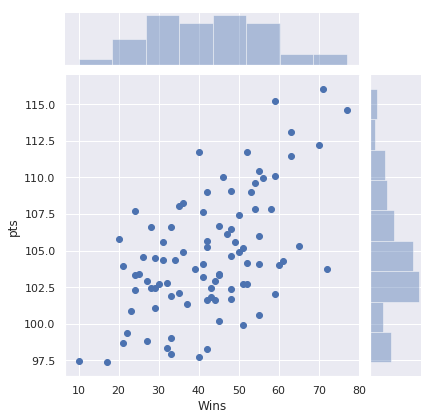

In [266]:
#Joint Scatter plot
sns.jointplot(data = combined, x= 'Wins',y = 'pts')


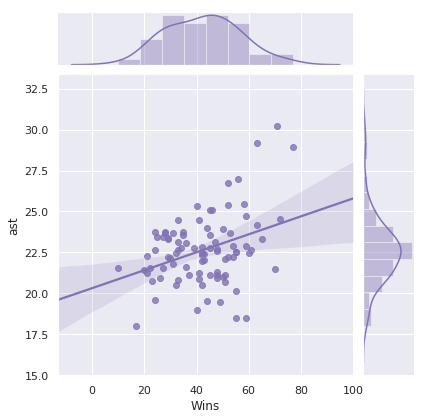

In [267]:
#Setting the style and adding a "fit" line. 
sns.set(style="darkgrid")
sns.jointplot(x='Wins',
              y='ast',
              kind='reg',
              color="m",
              data=combined)

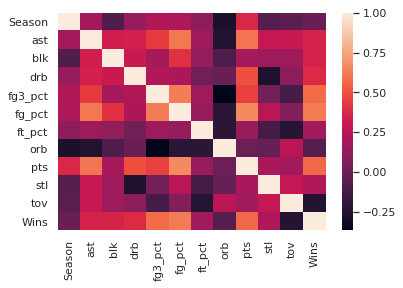

In [268]:
#Heatmap!
corr = combined.corr()

sns.heatmap(corr)

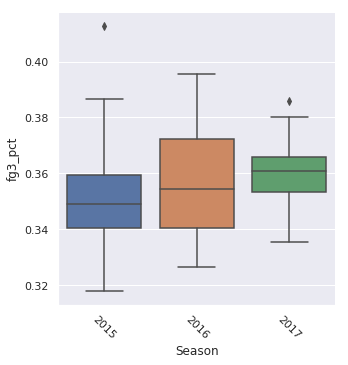

In [269]:
#Box Plots
g = sns.catplot(x='Season', 
                y='fg3_pct', 
                data=combined,
                kind="box") 
g.set_xticklabels(rotation=-45)

## 5. Prediction Model

Let's see if we can look at a team's stats and predict whether they won or not. 

This is a Classification Model (1/0 for Winning/Losing) vs a Regression model which outputs a number (e.g. score). 

**Credit:** This example used the following source for code:
'Machine Learning Mastery with Python' By Jason Brownlee

Get a copy here: [https://machinelearningmastery.com/](https://machinelearningmastery.com/)

In [270]:
#Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [271]:
df.head()

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,pts,team,Date,Time,OT,attendance,home/away,id,W/L,Season
0,240,37,96,0.385,12,29,0.414,20,26,0.769,...,106,Detroit Pistons,2015-10-27,20:00:00,NaN,19187,Away,0,W,2015
1,240,37,82,0.451,8,27,0.296,12,15,0.800,...,94,Atlanta Hawks,2015-10-27,20:00:00,NaN,19187,Home,0,L,2015
2,240,38,94,0.404,9,29,0.310,10,17,0.588,...,95,Cleveland Cavaliers,2015-10-27,20:00:00,NaN,21957,Away,1,L,2015
3,240,37,87,0.425,7,19,0.368,16,23,0.696,...,97,Chicago Bulls,2015-10-27,20:00:00,NaN,21957,Home,1,W,2015
4,240,35,83,0.422,6,18,0.333,19,27,0.704,...,95,New Orleans Pelicans,2015-10-27,22:30:00,NaN,19596,Away,2,L,2015


In [272]:
df.columns

Index(['mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'team', 'Date', 'Time', 'OT', 'attendance', 'home/away', 'id', 'W/L',
       'Season'],
      dtype='object')

Since the percentages (fg_pct, ft_pct, fg3_pct) are derived from the makes/attempts, we should only include one of these to fulful the independence assumption (all features should be independent). 

TRB (Total rebounds) is the same as ORB (Offensive Rebounds) + DRB (Defensive Rebounds), so we won't include that one either. 

In [273]:
X = df[['fg_pct','fg3_pct','ft_pct','orb','drb','ast','blk','tov','pf']]
Y = np.where(df['W/L']=="W",1,0)
print(len(X),len(Y))
validation_size = 0.2 # Percent of dataset that is used for validation
seed = 7 
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size = validation_size,random_state = seed)

7652 7652


In [274]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [275]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))

In [276]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.786961 (0.015968)
KNN: 0.660512 (0.016623)
CART: 0.704949 (0.017485)


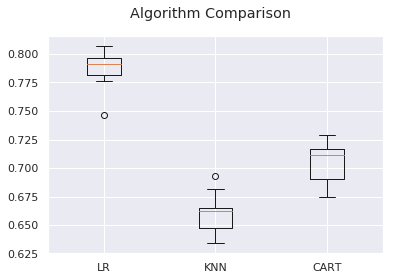

In [277]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic Regression seems to be performing the best. Let's see which features in the model are impacting our model the most. 

In [278]:
m = LogisticRegression()
m.fit(X_train,Y_train)
print(m.coef_)

predictions = m.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

[[ 13.60272614   4.96191137   1.61417596   0.08611132   0.16820715
    0.0296255    0.09474841  -0.12644475  -0.06177284]]
0.808621815807
[[593 154]
 [139 645]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       747
           1       0.81      0.82      0.81       784

   micro avg       0.81      0.81      0.81      1531
   macro avg       0.81      0.81      0.81      1531
weighted avg       0.81      0.81      0.81      1531



Since our features haven't been standardized, the coefficients will be largely depending on the scaling of the features. Let's try with Standardized inputs..

In [279]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
XR_train,XR_validation,YR_train,YR_validation = train_test_split(rescaledX,
                                                                 Y,test_size = validation_size,random_state = seed)
m.fit(XR_train,YR_train)
print(m.coef_)
print(X.columns)
predictions = m.predict(XR_validation)
print(accuracy_score(YR_validation,predictions))
print(confusion_matrix(YR_validation,predictions))
print(classification_report(YR_validation,predictions))

[[ 1.66550841  0.49822083  0.36834265  0.67274645  1.2591721  -0.08872089
   0.28581161 -0.61795647 -0.28005411]]
Index(['fg_pct', 'fg3_pct', 'ft_pct', 'orb', 'drb', 'ast', 'blk', 'tov', 'pf'], dtype='object')
0.814500326584
[[601 146]
 [138 646]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       747
           1       0.82      0.82      0.82       784

   micro avg       0.81      0.81      0.81      1531
   macro avg       0.81      0.81      0.81      1531
weighted avg       0.81      0.81      0.81      1531



Text(0.5,1,'Feature Importance')

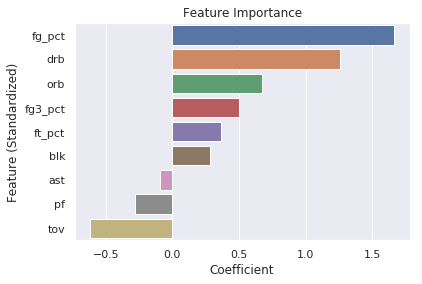

In [280]:
f = pd.DataFrame({'features':X.columns,'coef':m.coef_[0]})
f = f.sort_values(by = 'coef',ascending = False)
sns.barplot(data = f,x = 'coef',y = 'features')
plt.xlabel('Coefficient')
plt.ylabel('Feature (Standardized)')
plt.title("Feature Importance")

So for this model, field goal percentage, and defensive rebounds are the best predictors of winning. 

Interestingly, assists (ast) seem to correlate negatively with winning. This supports my personal hypothesis that the NBA is all about individually great players rather than great teams (as unfortunate as that is). 